## Cleaned Records of Death Causes in the United States

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
data = pd.read_csv('NCHS.csv')
data.head(3)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2


In [3]:
data.shape

(10296, 6)

In [4]:
data = data.dropna()
data.shape

(10296, 6)

## Unique Death Causes in the United States

In [5]:
causes = data["Cause Name"].unique()
causes

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Cancer', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'],
      dtype=object)

In [6]:
data = data[data["Cause Name"] != "All causes"]
causes = data["Cause Name"].unique()
causes

array(['Unintentional injuries', "Alzheimer's disease", 'Cancer', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia',
       'Kidney disease', 'Stroke', 'Suicide'], dtype=object)

In [7]:
len(causes)

10

## Unique States in the Study

In [8]:
state = data["State"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype=object)

In [9]:
data1 = data[data["State"] !="United States"]
state = data1["State"].unique()
state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
len(state)

51

In [11]:
data["Deaths"].sum()

68398104

## Study’s Death Trends per Year

In [12]:
dyear = data.groupby(["Year"]).sum()
dyear

,Deaths,Age-adjusted Death Rate
Year,,
1999,3811652,36290.4
2000,3804388,35849.3
2001,3798716,35256.0
2002,3837746,35101.3
2003,3824230,34504.9
2004,3728266,33029.7
2005,3779962,32947.6
2006,3709352,31757.6
2007,3692602,31046.7


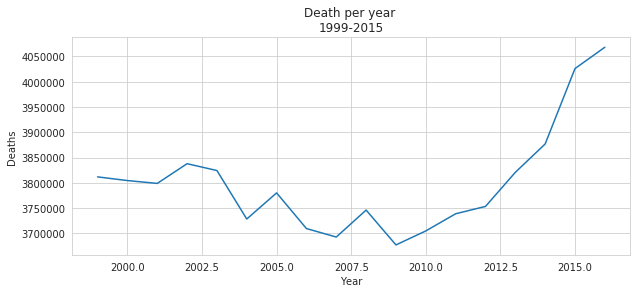

In [13]:
_, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(dyear.index, dyear.Deaths, ax=ax)
_ = ax.set_title("Death per year \n1999-2015")

## Top Ten States with the Highest Number of Deaths in the United States

In [14]:
data1 = data[data["State"] !="United States"]
dataset2 = data1.groupby("State").sum()
dataset2.sort_values("Deaths", ascending=False, inplace = True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
State,,,
California,361350,3387500,9902.4
Florida,361350,2381013,9934.1
Texas,361350,2223113,10970.2
New York,361350,2147657,10052.8
Pennsylvania,361350,1755797,11074.3
Ohio,361350,1513814,11729.3
Illinois,361350,1427335,10846.4
Michigan,361350,1239287,11468.1
North Carolina,361350,1048219,11408.7


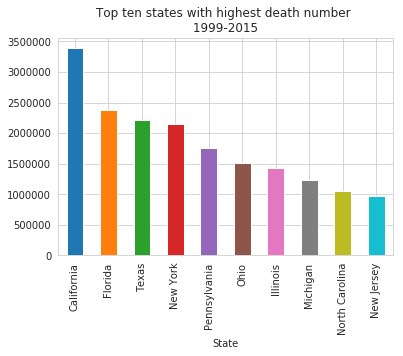

In [15]:
_ = dataset2["Deaths"].head(10).plot.bar(title= "Top ten states with highest death number \n 1999-2015 ")

## Top Ten Causes of Death in the United States

In [16]:
dataset1 = data[data["Cause Name"] != "All Causes"]
dataset2 = dataset1.groupby("Cause Name").sum()
dataset2.sort_values("Deaths", ascending=False, inplace=True)
dataset2.head(10)

,Year,Deaths,Age-adjusted Death Rate
Cause Name,,,
Heart disease,1879020,23150366,186996.3
Cancer,1879020,20489072,168385.3
Stroke,1879020,5160280,43391.4
CLRD,1879020,4869452,41787.4
Unintentional injuries,1879020,4355768,40086.7
Alzheimer's disease,1879020,2746824,23043.1
Diabetes,1879020,2632758,21969.7
Influenza and pneumonia,1879020,2077938,17212.2
Kidney disease,1879020,1615960,13234.5


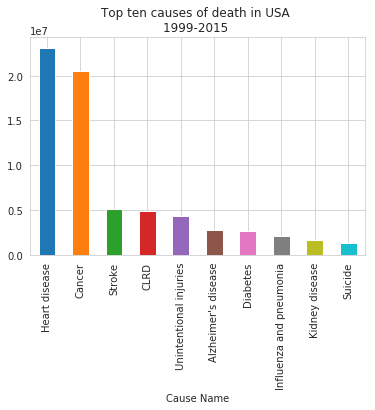

In [17]:
_ = dataset2["Deaths"].head(10).plot.bar(title="Top ten causes of death in USA \n1999-2015 ")